In [2]:
import pandas as pd
pd.options.display.max_columns = 100

In [22]:
data = pd.read_csv('../MSM_Survey_FS22.csv')

In [23]:
data.head()

,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Location Latitude,Location Longitude,Distribution Channel,User Language,How would you best describe your gender identity? - Selected Choice,How would you best describe your gender identity? - Self Identify (please specify) - Text,How would you best describe your racial/ethnic identity?,3.\tIs there any other demographic information you would like to share?,What is your current class standing?,In which of the following schools or colleges at the University of Missouri are you currently enrolled? (Check all that apply) - Selected Choice,In which of the following schools or colleges at the University of Missouri are you currently enrolled? (Check all that apply) - Other (please specify) - Text,Which student media entity did you work for this semester? (Check all that apply),Which section(s) or department(s) within your outlet do you work for? (Check all that apply),What is the highest position you hold within an MSM outlet?,How many semesters have you worked at Mizzou Student Media? (Including the current semester),Are you planning to return next semester? - Selected Choice,"Are you planning to return next semester? - No, please explain - Text","Do you feel that Mizzou Student Media is a safe, inclusive, equitable space? - Selected Choice","Do you feel that Mizzou Student Media is a safe, inclusive, equitable space? - Yes (please explain) - Text","Do you feel that Mizzou Student Media is a safe, inclusive, equitable space? - No (please explain) - Text",Which of the following skills did you learn from your experience in Mizzou Student Media? (Check all that apply) - Selected Choice,Which of the following skills did you learn from your experience in Mizzou Student Media? (Check all that apply) - Other - Please specify - Text,"On a scale of 1-5, how satisfied are you with the executive leadership of your outlet (General Managers, Editor-in-Chief/Managing Editor)? - Leadership","On a scale of 1-5, how would you rate your knowledge of the equipment at your outlet? - Equipment Knowledge","On a scale of 1-5, how would you rate the effectiveness of training and onboarding at your outlet? - Training & Onboarding","On a scale of 1-5, how effective is the Mizzou Student Media Team in supporting the efforts and operations of your outlet? - MSM Team",How would you describe the culture of your outlet? - Culture,Please explain at least one way in which your media outlet can work to improve your learning experience.,How do you believe your media outlet can improve its coverage?,Please leave a shoutout for someone who made a positive impact on your Mizzou Student Media experience this semester.,Is there anything else you would like to share?
0,11/28/22 14:44,11/28/22 15:33,IP Address,161.130.189.202,100,2914,True,11/28/22 15:33,R_2Yr1vpN2RqqcwH9,NaN,38.9361,-92.3056,anonymous,EN,Self Identify (please specify),Non-binary man,White,NaN,Junior,College of Arts and Science (includes the Scho...,NaN,MUTV,NaN,"Outlet executive (GM, AGM, EIC, ME)",5,"No, please explain","With MUTV folding, I don't really see a place ...",Yes (please explain),"I'm not the right person to ask, because any i...",NaN,"Collaboration,Communication,Leadership,Prepara...",NaN,3.0,2.0,3.0,4.0,3.0,N/A - media outlet no longer exists,N/A - media outlet no longer exists,Shoutout to the entire MSM exec board and MSM ...,NaN
1,11/28/22 19:46,11/28/22 19:47,IP Address,174.210.3.36,100,113,True,11/28/22 19:47,R_xzT7ZuuwwEV3IGJ,NaN,38.6154,-90.2159,anonymous,EN,Woman,NaN,White,NaN,Sophomore,School of Journalism,NaN,"Maneater,KCOU","News,Opinion,Visuals","Outlet executive board member (KCOU, MUTV, Man...",2,"No, please explain",NaN,Yes (please explain),NaN,NaN,Live radio production,NaN,5.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN
2,11/28/22 19:50,11/28/22 19:55,IP Address,173.30.197.174,100,311,True,11/28/22 19:55,R_3O8PdtFyItEyDeh,NaN,38.9361,-92.3056,anonymous,EN,Ma

In [24]:
data.columns.values

array(['Start Date', 'End Date', 'Response Type', 'IP Address',
       'Progress', 'Duration (in seconds)', 'Finished', 'Recorded Date',
       'Response ID', 'Recipient Last Name', 'Location Latitude',
       'Location Longitude', 'Distribution Channel', 'User Language',
       'How would you best describe your gender identity? - Selected Choice',
       'How would you best describe your gender identity? - Self Identify (please specify) - Text',
       'How would you best describe your racial/ethnic identity?',
       '3.\tIs there any other demographic information you would like to share?',
       'What is your current class standing?',
       'In which of the following schools or colleges at the University of Missouri are you currently enrolled? (Check all that apply) - Selected Choice',
       'In which of the following schools or colleges at the University of Missouri are you currently enrolled? (Check all that apply) - Other (please specify) - Text',
       'Which student media e

## Flags

In [25]:
maneater_responses = data.loc[data['Which student media entity did you work for this semester? (Check all that apply)'].fillna("").str.contains(("Maneater")),]

In [26]:
kcou_responses = data.loc[data['Which student media entity did you work for this semester? (Check all that apply)'].fillna("").str.contains(("KCOU")),]

In [27]:
mutv_responses = data.loc[data['Which student media entity did you work for this semester? (Check all that apply)'].fillna("").str.contains(("MUTV")),]

In [28]:
msm_responses = data.loc[data['Which student media entity did you work for this semester? (Check all that apply)'].fillna("").str.contains(("Mizzou Student Media Team")),]

In [30]:
maneater_flag = [True if any(y in x for y in maneater_responses['Response ID']) else False for x in data['Response ID'].fillna('x')]

In [31]:
kcou_flag = [True if any(y in x for y in kcou_responses['Response ID']) else False for x in data['Response ID'].fillna('x')]

In [32]:
msm_flag = [True if any(y in x for y in msm_responses['Response ID']) else False for x in data['Response ID'].fillna('x')]

In [33]:
mutv_flag = [True if any(y in x for y in mutv_responses['Response ID']) else False for x in data['Response ID'].fillna('x')]

In [37]:
data['maneater_flag'] = maneater_flag

In [38]:
data['mutv_flag'] = mutv_flag

In [39]:
data['kcou_flag'] = kcou_flag

In [40]:
data['msm_flag'] = msm_flag

In [51]:
staff_responses = data.loc[data['What is the highest position you hold within an MSM outlet?'].fillna("").str.contains(("Staff member")),]

In [52]:
staff_flag = [True if any(y in x for y in staff_responses['Response ID']) else False for x in data['Response ID'].fillna('x')]

In [53]:
data['staff_flag'] = staff_flag

In [59]:
board_responses = data.loc[data['What is the highest position you hold within an MSM outlet?'].fillna("").str.contains(("executive")),]

In [60]:
board_flag = [True if any(y in x for y in board_responses['Response ID']) else False for x in data['Response ID'].fillna('x')]

In [61]:
data['board_flag'] = board_flag

In [44]:
data['What is the highest position you hold within an MSM outlet?'].value_counts()

Staff member                                                            25
Outlet executive board member (KCOU, MUTV, Maneater Editorial Board)    23
MSM Team Member                                                         19
Outlet executive (GM, AGM, EIC, ME)                                      2
Other                                                                    1
Name: What is the highest position you hold within an MSM outlet?, dtype: int64

In [36]:
data.columns.values

array(['Start Date', 'End Date', 'Response Type', 'IP Address',
       'Progress', 'Duration (in seconds)', 'Finished', 'Recorded Date',
       'Response ID', 'Recipient Last Name', 'Location Latitude',
       'Location Longitude', 'Distribution Channel', 'User Language',
       'How would you best describe your gender identity? - Selected Choice',
       'How would you best describe your gender identity? - Self Identify (please specify) - Text',
       'How would you best describe your racial/ethnic identity?',
       '3.\tIs there any other demographic information you would like to share?',
       'What is your current class standing?',
       'In which of the following schools or colleges at the University of Missouri are you currently enrolled? (Check all that apply) - Selected Choice',
       'In which of the following schools or colleges at the University of Missouri are you currently enrolled? (Check all that apply) - Other (please specify) - Text',
       'Which student media e

In [17]:
data['Which student media entity did you work for this semester? (Check all that apply)'].value_counts()

KCOU                                                      32
Maneater                                                  18
Mizzou Student Media Team                                  5
MUTV,KCOU                                                  3
Maneater,MSM Podcast Network                               3
Maneater,Mizzou Student Media Team,MSM Podcast Network     2
Maneater,KCOU                                              2
Maneater,MUTV                                              1
Maneater,MUTV,KCOU                                         1
KCOU,Mizzou Student Media Team                             1
Mizzou Student Media Team,MSM Podcast Network              1
MUTV                                                       1
Name: Which student media entity did you work for this semester? (Check all that apply), dtype: int64

In [15]:
executive_responses = data.loc[data['What is the highest position you hold within an MSM outlet?'].fillna("").str.contains(("GM")),]

In [16]:
executive_responses

,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Location Latitude,Location Longitude,Distribution Channel,User Language,How would you best describe your gender identity? - Selected Choice,How would you best describe your gender identity? - Self Identify (please specify) - Text,How would you best describe your racial/ethnic identity?,3.\tIs there any other demographic information you would like to share?,What is your current class standing?,In which of the following schools or colleges at the University of Missouri are you currently enrolled? (Check all that apply) - Selected Choice,In which of the following schools or colleges at the University of Missouri are you currently enrolled? (Check all that apply) - Other (please specify) - Text,Which student media entity did you work for this semester? (Check all that apply),Which section(s) or department(s) within your outlet do you work for? (Check all that apply),What is the highest position you hold within an MSM outlet?,How many semesters have you worked at Mizzou Student Media? (Including the current semester),Are you planning to return next semester? - Selected Choice,"Are you planning to return next semester? - No, please explain - Text","Do you feel that Mizzou Student Media is a safe, inclusive, equitable space? - Selected Choice","Do you feel that Mizzou Student Media is a safe, inclusive, equitable space? - Yes (please explain) - Text","Do you feel that Mizzou Student Media is a safe, inclusive, equitable space? - No (please explain) - Text",Which of the following skills did you learn from your experience in Mizzou Student Media? (Check all that apply) - Selected Choice,Which of the following skills did you learn from your experience in Mizzou Student Media? (Check all that apply) - Other - Please specify - Text,"On a scale of 1-5, how satisfied are you with the executive leadership of your outlet (General Managers, Editor-in-Chief/Managing Editor)? - Leadership","On a scale of 1-5, how would you rate your knowledge of the equipment at your outlet? - Equipment Knowledge","On a scale of 1-5, how would you rate the effectiveness of training and onboarding at your outlet? - Training & Onboarding","On a scale of 1-5, how effective is the Mizzou Student Media Team in supporting the efforts and operations of your outlet? - MSM Team",How would you describe the culture of your outlet? - Culture,Please explain at least one way in which your media outlet can work to improve your learning experience.,How do you believe your media outlet can improve its coverage?,Please leave a shoutout for someone who made a positive impact on your Mizzou Student Media experience this semester.,Is there anything else you would like to share?
0,11/28/22 14:44,11/28/22 15:33,IP Address,161.130.189.202,100,2914,True,11/28/22 15:33,R_2Yr1vpN2RqqcwH9,NaN,38.9361,-92.3056,anonymous,EN,Self Identify (please specify),Non-binary man,White,NaN,Junior,College of Arts and Science (includes the Scho...,NaN,MUTV,NaN,"Outlet executive (GM, AGM, EIC, ME)",5,"No, please explain","With MUTV folding, I don't really see a place ...",Yes (please explain),"I'm not the right person to ask, because any i...",NaN,"Collaboration,Communication,Leadership,Prepara...",NaN,3.0,2.0,3.0,4.0,3.0,N/A - media outlet no longer exists,N/A - media outlet no longer exists,Shoutout to the entire MSM exec board and MSM ...,NaN
50,12/7/22 9:44,12/7/22 9:47,IP Address,172.58.59.1,100,158,True,12/7/22 9:47,R_djm8c1lfBGftgUF,NaN,39.7388,-104.9868,anonymous,EN,Woman,NaN,White,NaN,Sophomore,College of Arts and Science (includes the Scho...,NaN,"Maneater,MSM Podcast Network",NaN,"Outlet executive (GM, AGM, EIC, ME)",3,Yes,NaN,Yes (please explain),NaN,NaN,"Adobe Audition,Adobe Premiere,AP Style,Audio e...",NaN,4.0,4.0,4.0,NaN,4.0,I believe my outlet needs to engage in more bo...,Our coverage needs to be more frequent and rob...,Piper Molins was an incredible member

In [9]:
## Total People: Maneater: 198 (32 exec) | KCOU: 258 (13 exec)

In [42]:
sum(data['maneater_flag'])/198

0.13636363636363635

In [43]:
sum(data['kcou_flag'])/258

0.1511627906976744

In [55]:
sum(data['staff_flag'])/(258+198-32-13)

0.06082725060827251

In [54]:
sum(data['staff_flag'])

25

In [58]:
(len(data['staff_flag'])-sum(data['staff_flag'])-sum(data['msm_flag']))/(32+13)

0.8

In [62]:
sum(data['board_flag'])

25

In [64]:
sum(data['msm_flag'])

9

In [115]:
data.columns.values

array(['Start Date', 'End Date', 'Response Type', 'IP Address',
       'Progress', 'Duration (in seconds)', 'Finished', 'Recorded Date',
       'Response ID', 'Recipient Last Name', 'Location Latitude',
       'Location Longitude', 'Distribution Channel', 'User Language',
       'How would you best describe your gender identity? - Selected Choice',
       'How would you best describe your gender identity? - Self Identify (please specify) - Text',
       'How would you best describe your racial/ethnic identity?',
       '3.\tIs there any other demographic information you would like to share?',
       'What is your current class standing?',
       'In which of the following schools or colleges at the University of Missouri are you currently enrolled? (Check all that apply) - Selected Choice',
       'In which of the following schools or colleges at the University of Missouri are you currently enrolled? (Check all that apply) - Other (please specify) - Text',
       'Which student media e

## Maneater Analysis

### Outlet Demographic Numbers

#### Semesters

In [108]:
maneater_responses['How many semesters have you worked at Mizzou Student Media? (Including the current semester)'].value_counts()

1    15
3     9
2     3
Name: How many semesters have you worked at Mizzou Student Media? (Including the current semester), dtype: int64

In [112]:
maneater_responses['How many semesters have you worked at Mizzou Student Media? (Including the current semester)'].astype(int).mean()

1.7777777777777777

#### Gender

In [113]:
maneater_responses['How would you best describe your gender identity? - Selected Choice'].value_counts()

Woman                                     18
Man                                        5
Non-binary/gender non-conforming           3
Woman,Non-binary/gender non-conforming     1
Name: How would you best describe your gender identity? - Selected Choice, dtype: int64

In [130]:
maneater_responses['How would you best describe your gender identity? - Selected Choice'].value_counts(normalize=True)

Woman                                     0.666667
Man                                       0.185185
Non-binary/gender non-conforming          0.111111
Woman,Non-binary/gender non-conforming    0.037037
Name: How would you best describe your gender identity? - Selected Choice, dtype: float64

#### Race/Ethnicity

In [114]:
    maneater_responses['How would you best describe your racial/ethnic identity?'].value_counts()

White                                        21
Hispanic, Latino, or Spanish Origin,White     3
Asian,Middle Eastern or North African         1
Black or African American                     1
Middle Eastern or North African,White         1
Name: How would you best describe your racial/ethnic identity?, dtype: int64

In [131]:
    maneater_responses['How would you best describe your racial/ethnic identity?'].value_counts(normalize=True)

White                                        0.777778
Hispanic, Latino, or Spanish Origin,White    0.111111
Asian,Middle Eastern or North African        0.037037
Black or African American                    0.037037
Middle Eastern or North African,White        0.037037
Name: How would you best describe your racial/ethnic identity?, dtype: float64

#### Class Standing

In [116]:
maneater_responses['What is your current class standing?'].value_counts()

Sophomore                  15
Freshman                   10
Junior                      1
Non-traditional student     1
Name: What is your current class standing?, dtype: int64

In [132]:
maneater_responses['What is your current class standing?'].value_counts(normalize=True)

Sophomore                  0.555556
Freshman                   0.370370
Junior                     0.037037
Non-traditional student    0.037037
Name: What is your current class standing?, dtype: float64

#### Returning

In [117]:
maneater_responses['Are you planning to return next semester? - Selected Choice'].value_counts()

Yes                   24
No, please explain     3
Name: Are you planning to return next semester? - Selected Choice, dtype: int64

In [133]:
maneater_responses['Are you planning to return next semester? - Selected Choice'].value_counts(normalize=True)

Yes                   0.888889
No, please explain    0.111111
Name: Are you planning to return next semester? - Selected Choice, dtype: float64

#### Safety

In [118]:
maneater_responses['Do you feel that Mizzou Student Media is a safe, inclusive, equitable space? - Selected Choice'].value_counts()

Yes (please explain)    26
No (please explain)      1
Name: Do you feel that Mizzou Student Media is a safe, inclusive, equitable space? - Selected Choice, dtype: int64

In [134]:
maneater_responses['Do you feel that Mizzou Student Media is a safe, inclusive, equitable space? - Selected Choice'].value_counts(normalize=True)

Yes (please explain)    0.962963
No (please explain)     0.037037
Name: Do you feel that Mizzou Student Media is a safe, inclusive, equitable space? - Selected Choice, dtype: float64

### Leadership Satisfaction

In [68]:
maneater_responses['On a scale of 1-5, how satisfied are you with the executive leadership of your outlet (General Managers, Editor-in-Chief/Managing Editor)? - Leadership'].describe()

count    27.000000
mean      4.370370
std       0.883531
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: On a scale of 1-5, how satisfied are you with the executive leadership of your outlet (General Managers, Editor-in-Chief/Managing Editor)? - Leadership, dtype: float64

<AxesSubplot:>

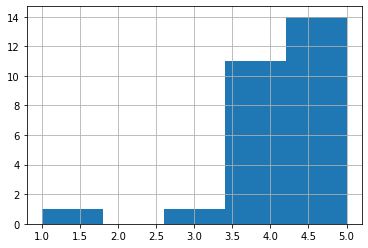

In [74]:
maneater_responses['On a scale of 1-5, how satisfied are you with the executive leadership of your outlet (General Managers, Editor-in-Chief/Managing Editor)? - Leadership'].hist(bins=5)

In [73]:
maneater_responses['On a scale of 1-5, how satisfied are you with the executive leadership of your outlet (General Managers, Editor-in-Chief/Managing Editor)? - Leadership'].value_counts()

5.0    14
4.0    11
3.0     1
1.0     1
Name: On a scale of 1-5, how satisfied are you with the executive leadership of your outlet (General Managers, Editor-in-Chief/Managing Editor)? - Leadership, dtype: int64

In [78]:
25/27

0.9259259259259259

### MSM Team Effectiveness

In [79]:
maneater_responses['On a scale of 1-5, how effective is the Mizzou Student Media Team in supporting the efforts and operations of your outlet? - MSM Team'].describe()

count    26.000000
mean      3.461538
std       1.174079
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: On a scale of 1-5, how effective is the Mizzou Student Media Team in supporting the efforts and operations of your outlet? - MSM Team, dtype: float64

<AxesSubplot:>

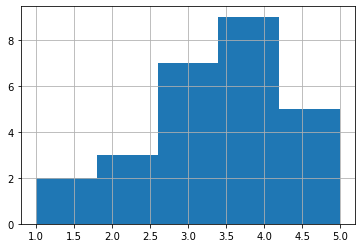

In [80]:
maneater_responses['On a scale of 1-5, how effective is the Mizzou Student Media Team in supporting the efforts and operations of your outlet? - MSM Team'].hist(bins=5)

In [81]:
maneater_responses['On a scale of 1-5, how effective is the Mizzou Student Media Team in supporting the efforts and operations of your outlet? - MSM Team'].value_counts()

4.0    9
3.0    7
5.0    5
2.0    3
1.0    2
Name: On a scale of 1-5, how effective is the Mizzou Student Media Team in supporting the efforts and operations of your outlet? - MSM Team, dtype: int64

In [85]:
14/26

0.5384615384615384

In [87]:
maneater_responses['On a scale of 1-5, how would you rate the effectiveness of training and onboarding at your outlet? - Training & Onboarding'].describe()

count    26.000000
mean      3.538462
std       0.904689
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: On a scale of 1-5, how would you rate the effectiveness of training and onboarding at your outlet? - Training & Onboarding, dtype: float64

### Onboarding Effectiveness

In [103]:
maneater_responses['On a scale of 1-5, how would you rate the effectiveness of training and onboarding at your outlet? - Training & Onboarding'].describe()

count    26.000000
mean      3.538462
std       0.904689
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: On a scale of 1-5, how would you rate the effectiveness of training and onboarding at your outlet? - Training & Onboarding, dtype: float64

<AxesSubplot:>

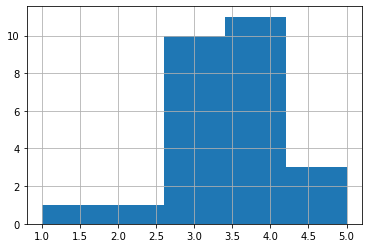

In [88]:
maneater_responses['On a scale of 1-5, how would you rate the effectiveness of training and onboarding at your outlet? - Training & Onboarding'].hist(bins=5)

In [89]:
maneater_responses['On a scale of 1-5, how would you rate the effectiveness of training and onboarding at your outlet? - Training & Onboarding'].value_counts()

4.0    11
3.0    10
5.0     3
2.0     1
1.0     1
Name: On a scale of 1-5, how would you rate the effectiveness of training and onboarding at your outlet? - Training & Onboarding, dtype: int64

In [85]:
14/26

0.5384615384615384

In [91]:
maneater_responses['On a scale of 1-5, how would you rate the effectiveness of training and onboarding at your outlet? - Training & Onboarding'].corr(maneater_responses['On a scale of 1-5, how effective is the Mizzou Student Media Team in supporting the efforts and operations of your outlet? - MSM Team'])

0.4909146949248281

In [92]:
data['On a scale of 1-5, how would you rate the effectiveness of training and onboarding at your outlet? - Training & Onboarding'].corr(data['On a scale of 1-5, how effective is the Mizzou Student Media Team in supporting the efforts and operations of your outlet? - MSM Team'])

0.4236555010232974

### Equipment Knowledge

In [98]:
maneater_responses['On a scale of 1-5, how would you rate your knowledge of the equipment at your outlet? - Equipment Knowledge'].describe()

count    23.000000
mean      3.260870
std       0.751809
min       2.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: On a scale of 1-5, how would you rate your knowledge of the equipment at your outlet? - Equipment Knowledge, dtype: float64

<AxesSubplot:>

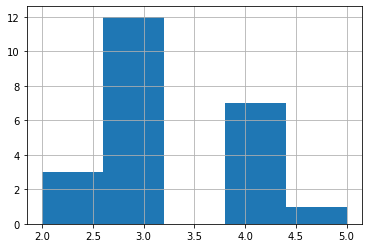

In [99]:
maneater_responses['On a scale of 1-5, how would you rate your knowledge of the equipment at your outlet? - Equipment Knowledge'].hist(bins=5)

In [100]:
maneater_responses['On a scale of 1-5, how would you rate your knowledge of the equipment at your outlet? - Equipment Knowledge'].value_counts()

3.0    12
4.0     7
2.0     3
5.0     1
Name: On a scale of 1-5, how would you rate your knowledge of the equipment at your outlet? - Equipment Knowledge, dtype: int64

In [102]:
8/23

0.34782608695652173

## KCOU Analysis

### Outlet Demographic Numbers

#### Semesters

In [119]:
kcou_responses['How many semesters have you worked at Mizzou Student Media? (Including the current semester)'].value_counts()

1     18
6+     6
3      6
4      5
5      3
2      1
Name: How many semesters have you worked at Mizzou Student Media? (Including the current semester), dtype: int64

#### Gender

In [121]:
kcou_responses['How would you best describe your gender identity? - Selected Choice'].value_counts()

Man                                 22
Woman                               14
Non-binary/gender non-conforming     3
Name: How would you best describe your gender identity? - Selected Choice, dtype: int64

In [129]:
kcou_responses['How would you best describe your gender identity? - Selected Choice'].value_counts(normalize=True)

Man                                 0.564103
Woman                               0.358974
Non-binary/gender non-conforming    0.076923
Name: How would you best describe your gender identity? - Selected Choice, dtype: float64

#### Race/Ethnicity

In [122]:
kcou_responses['How would you best describe your racial/ethnic identity?'].value_counts()

White                                    33
Hispanic, Latino, or Spanish Origin       2
Black or African American,White           1
Asian                                     1
Middle Eastern or North African,White     1
Black or African American                 1
Name: How would you best describe your racial/ethnic identity?, dtype: int64

#### Class Standing

In [123]:
kcou_responses['What is your current class standing?'].value_counts()

Sophomore    13
Freshman      9
Senior        9
Junior        8
Name: What is your current class standing?, dtype: int64

In [128]:
kcou_responses['What is your current class standing?'].value_counts(normalize=True)

Sophomore    0.333333
Freshman     0.230769
Senior       0.230769
Junior       0.205128
Name: What is your current class standing?, dtype: float64

#### Returning

In [124]:
kcou_responses['Are you planning to return next semester? - Selected Choice'].value_counts()

Yes                   38
No, please explain     1
Name: Are you planning to return next semester? - Selected Choice, dtype: int64

In [127]:
kcou_responses['Are you planning to return next semester? - Selected Choice'].value_counts(normalize=True)

Yes                   0.974359
No, please explain    0.025641
Name: Are you planning to return next semester? - Selected Choice, dtype: float64

#### Safety

In [125]:
kcou_responses['Do you feel that Mizzou Student Media is a safe, inclusive, equitable space? - Selected Choice'].value_counts()

Yes (please explain)    38
No (please explain)      1
Name: Do you feel that Mizzou Student Media is a safe, inclusive, equitable space? - Selected Choice, dtype: int64

In [126]:
kcou_responses['Do you feel that Mizzou Student Media is a safe, inclusive, equitable space? - Selected Choice'].value_counts(normalize=True)

Yes (please explain)    0.974359
No (please explain)     0.025641
Name: Do you feel that Mizzou Student Media is a safe, inclusive, equitable space? - Selected Choice, dtype: float64

### Leadership Satisfaction

In [69]:
kcou_responses['On a scale of 1-5, how satisfied are you with the executive leadership of your outlet (General Managers, Editor-in-Chief/Managing Editor)? - Leadership'].describe()

count    38.000000
mean      4.605263
std       0.789782
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: On a scale of 1-5, how satisfied are you with the executive leadership of your outlet (General Managers, Editor-in-Chief/Managing Editor)? - Leadership, dtype: float64

<AxesSubplot:>

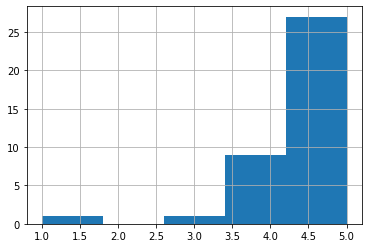

In [75]:
kcou_responses['On a scale of 1-5, how satisfied are you with the executive leadership of your outlet (General Managers, Editor-in-Chief/Managing Editor)? - Leadership'].hist(bins=5)

In [72]:
kcou_responses['On a scale of 1-5, how satisfied are you with the executive leadership of your outlet (General Managers, Editor-in-Chief/Managing Editor)? - Leadership'].value_counts()

5.0    27
4.0     9
3.0     1
1.0     1
Name: On a scale of 1-5, how satisfied are you with the executive leadership of your outlet (General Managers, Editor-in-Chief/Managing Editor)? - Leadership, dtype: int64

In [77]:
36/38

0.9473684210526315

### MSM Team effectiveness

In [82]:
kcou_responses['On a scale of 1-5, how effective is the Mizzou Student Media Team in supporting the efforts and operations of your outlet? - MSM Team'].describe()

count    35.000000
mean      3.657143
std       1.136115
min       1.000000
25%       3.000000
50%       4.000000
75%       4.500000
max       5.000000
Name: On a scale of 1-5, how effective is the Mizzou Student Media Team in supporting the efforts and operations of your outlet? - MSM Team, dtype: float64

<AxesSubplot:>

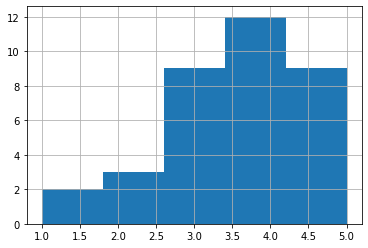

In [83]:
kcou_responses['On a scale of 1-5, how effective is the Mizzou Student Media Team in supporting the efforts and operations of your outlet? - MSM Team'].hist(bins=5)

In [84]:
kcou_responses['On a scale of 1-5, how effective is the Mizzou Student Media Team in supporting the efforts and operations of your outlet? - MSM Team'].value_counts()

4.0    12
3.0     9
5.0     9
2.0     3
1.0     2
Name: On a scale of 1-5, how effective is the Mizzou Student Media Team in supporting the efforts and operations of your outlet? - MSM Team, dtype: int64

In [86]:
21/35

0.6

### Onboarding Effectiveness

In [93]:
kcou_responses['On a scale of 1-5, how would you rate the effectiveness of training and onboarding at your outlet? - Training & Onboarding'].describe()

count    33.000000
mean      3.727273
std       0.839372
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: On a scale of 1-5, how would you rate the effectiveness of training and onboarding at your outlet? - Training & Onboarding, dtype: float64

<AxesSubplot:>

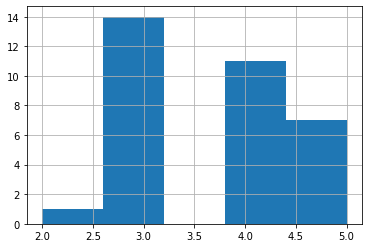

In [94]:
kcou_responses['On a scale of 1-5, how would you rate the effectiveness of training and onboarding at your outlet? - Training & Onboarding'].hist(bins=5)

In [95]:
kcou_responses['On a scale of 1-5, how would you rate the effectiveness of training and onboarding at your outlet? - Training & Onboarding'].value_counts()

3.0    14
4.0    11
5.0     7
2.0     1
Name: On a scale of 1-5, how would you rate the effectiveness of training and onboarding at your outlet? - Training & Onboarding, dtype: int64

In [96]:
18/33

0.5454545454545454

In [97]:
kcou_responses['On a scale of 1-5, how would you rate the effectiveness of training and onboarding at your outlet? - Training & Onboarding'].corr(kcou_responses['On a scale of 1-5, how effective is the Mizzou Student Media Team in supporting the efforts and operations of your outlet? - MSM Team'])

0.2935853032711225

### Equipment Knowledge

In [104]:
kcou_responses['On a scale of 1-5, how would you rate your knowledge of the equipment at your outlet? - Equipment Knowledge'].describe()

count    36.000000
mean      3.666667
std       0.828079
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: On a scale of 1-5, how would you rate your knowledge of the equipment at your outlet? - Equipment Knowledge, dtype: float64

<AxesSubplot:>

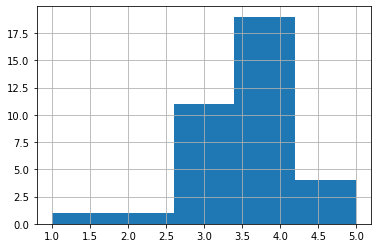

In [105]:
kcou_responses['On a scale of 1-5, how would you rate your knowledge of the equipment at your outlet? - Equipment Knowledge'].hist(bins=5)

In [106]:
kcou_responses['On a scale of 1-5, how would you rate your knowledge of the equipment at your outlet? - Equipment Knowledge'].value_counts()

4.0    19
3.0    11
5.0     4
2.0     1
1.0     1
Name: On a scale of 1-5, how would you rate your knowledge of the equipment at your outlet? - Equipment Knowledge, dtype: int64

In [107]:
23/36

0.6388888888888888

# Geoffrey Curiosity

In [136]:
maneater_responses.columns.values

array(['Start Date', 'End Date', 'Response Type', 'IP Address',
       'Progress', 'Duration (in seconds)', 'Finished', 'Recorded Date',
       'Response ID', 'Recipient Last Name', 'Location Latitude',
       'Location Longitude', 'Distribution Channel', 'User Language',
       'How would you best describe your gender identity? - Selected Choice',
       'How would you best describe your gender identity? - Self Identify (please specify) - Text',
       'How would you best describe your racial/ethnic identity?',
       '3.\tIs there any other demographic information you would like to share?',
       'What is your current class standing?',
       'In which of the following schools or colleges at the University of Missouri are you currently enrolled? (Check all that apply) - Selected Choice',
       'In which of the following schools or colleges at the University of Missouri are you currently enrolled? (Check all that apply) - Other (please specify) - Text',
       'Which student media e

In [138]:
maneater_sports = maneater_responses.loc[maneater_responses['Which section(s) or department(s) within your outlet do you work for? (Check all that apply)'].fillna("").str.contains(("Sports")),]

In [143]:
maneater_sports['How would you best describe your gender identity? - Selected Choice'].value_counts(normalize=True)

Man                                       0.4
Non-binary/gender non-conforming          0.2
Woman                                     0.2
Woman,Non-binary/gender non-conforming    0.2
Name: How would you best describe your gender identity? - Selected Choice, dtype: float64

In [144]:
kcou_sports = kcou_responses.loc[kcou_responses['Which section(s) or department(s) within your outlet do you work for? (Check all that apply)'].fillna("").str.contains(("Sports")),]

In [146]:
kcou_sports['How would you best describe your gender identity? - Selected Choice'].value_counts(normalize=False)

Man      12
Woman     1
Name: How would you best describe your gender identity? - Selected Choice, dtype: int64

In [145]:
kcou_sports['How would you best describe your gender identity? - Selected Choice'].value_counts(normalize=True)

Man      0.923077
Woman    0.076923
Name: How would you best describe your gender identity? - Selected Choice, dtype: float64